<a href="https://colab.research.google.com/github/sudip7407/Spoon-Knife/blob/main/Loan_Defaulter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style = "darkgrid")

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
from google.colab import files
uploaded=files.upload()

In [30]:
data = pd.read_csv("Training Data.csv")
#data.head()

In [31]:
!pip install --upgrade category_encoders

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce

In [33]:
label_encoder = LabelEncoder()
label_encoder = LabelEncoder()
for col in ['Married/Single','Car_Ownership']:
    data[col] = label_encoder.fit_transform( data[col] )
#data.head()

In [34]:
onehot_encoder = OneHotEncoder(sparse = False)
data['House_Ownership'] = onehot_encoder.fit_transform(data['House_Ownership'].values.reshape(-1, 1) )
#data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [35]:
# high_card_features = ['Profession', 'CITY', 'STATE']
# count_encoder = ce.CountEncoder()
# # Transform the features, rename the columns with the _count suffix, and join to dataframe
# count_encoded = count_encoder.fit_transform( data[high_card_features] )
# data = data.join(count_encoded.add_suffix("_count"))
# data= data.drop(labels=['Profession', 'CITY', 'STATE'], axis=1)
# data.head()

In [36]:
X = data.drop(['Id','Profession', 'CITY', 'STATE','Risk_Flag'], axis=1)
y = data["Risk_Flag"]
X.head()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 7)

In [37]:
# Create Decision Tree classifer object
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [38]:
# from six import StringIO
# from sklearn.tree import export_graphviz
# #from sklearn.externals.six import StringIO
# from IPython.display import Image
# import pydotplus

# import six
# import sys
# sys.modules['sklearn.externals.six'] = six
# dot_data = StringIO()

# export_graphviz(clf, out_file=dot_data,
#                 filled=True, rounded=True,
#                 special_characters=True,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.write_png('Loan-Defaulter.png')
# Image(graph.create_png())

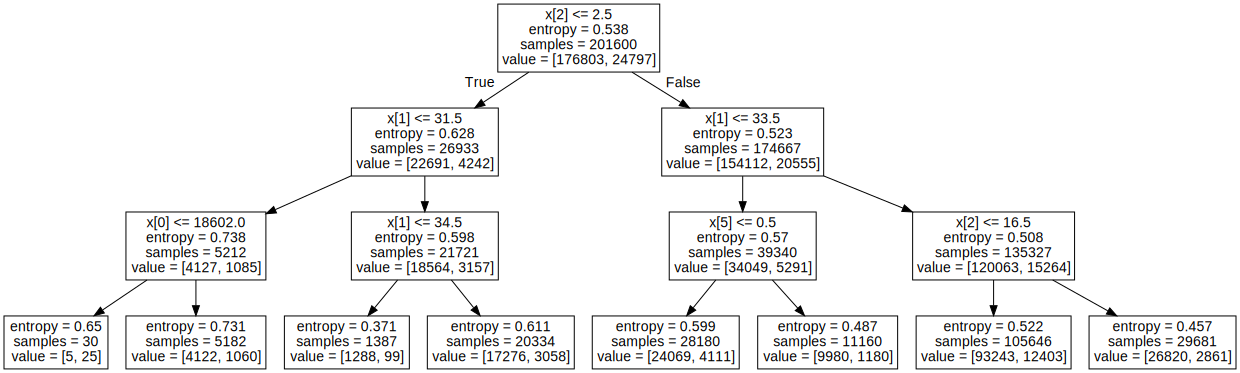

In [39]:
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import display

display(graphviz.Source(export_graphviz(clf)))

In [40]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8770833333333333
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     44201
           1       0.75      0.00      0.00      6199

    accuracy                           0.88     50400
   macro avg       0.81      0.50      0.47     50400
weighted avg       0.86      0.88      0.82     50400



In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[44199     2]
 [ 6193     6]]


In [42]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,random_state=0,criterion='entropy')
# fit the model
rfc.fit(X_train, y_train)
RandomForestClassifier(criterion='entropy', random_state=0)
# Predict the Test set results
y_pred = rfc.predict(X_test)
# Check accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy score with 2 decision-trees : {0:0.2f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 2 decision-trees : 0.90


In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[41934  2267]
 [ 2950  3249]]
